In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from simulator import Simulation

warnings.simplefilter(action='ignore', category=UserWarning)

In [12]:
def plot_distribution(project_df):    
    fig, ax = plt.subplots(figsize=(15,5))
    project_df['token_amount'].plot(kind='bar', width=1, ax=ax)
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("Tokens")
    fig.show()
    
    
def plot_alignment(project_df):    
    fig, ax = plt.subplots(figsize=(15,5))
    project_df.plot(kind='scatter', x='rating', y='token_amount', ax=ax)
    ax.set_ylabel("Tokens")
    ax.set_xlabel("Impact")
    ax.set_xticks([])    
    fig.show()
    
    
def analyze_simulation(results):
    print(pd.Series(results).iloc[:-1].apply(lambda x: int(x) if isinstance(x, float) else x))
    data = results['data']
    project_df = pd.DataFrame(data).sort_values(by='token_amount', ascending=False)
    plot_distribution(project_df)    
    plot_alignment(project_df)

# Base Model

In [7]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=17,
    min_amount=1500,
    normalize=True
)

scoring_method               median
vote_quorum                      17
min_amount                     1500
normalize                      True
num_projects_above_quorum       451
avg_payout                    66507
median_payout                 35367
max_payout                   439910
dtype: object


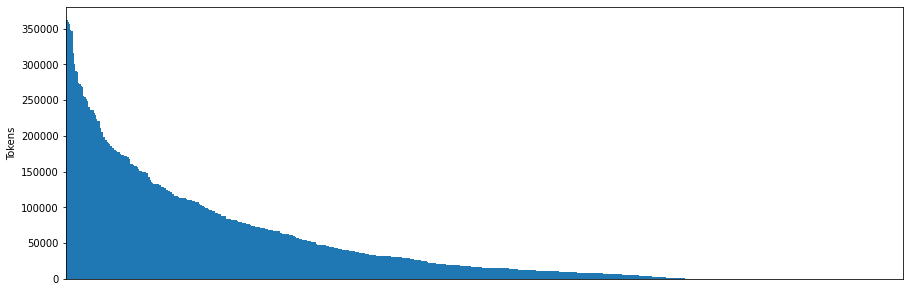

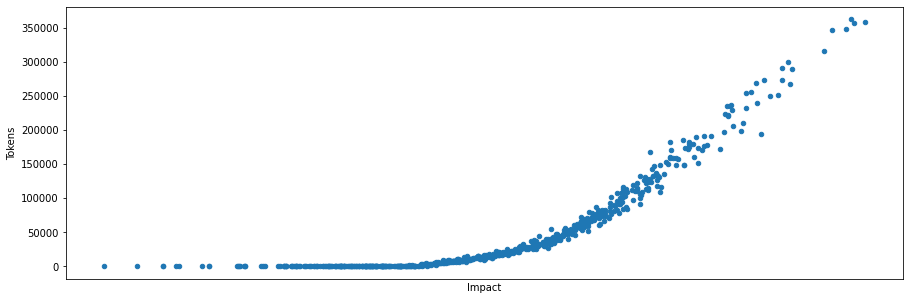

In [13]:
analyze_simulation(results)

## 1. What is the impact if a badgeholder deploys all of the 30M vs less than 30M?

In [14]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=0.5, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=17,
    min_amount=1500,
    normalize=True
)

scoring_method               median
vote_quorum                      17
min_amount                     1500
normalize                      True
num_projects_above_quorum       459
avg_payout                    65320
median_payout                 35258
max_payout                   434964
dtype: object


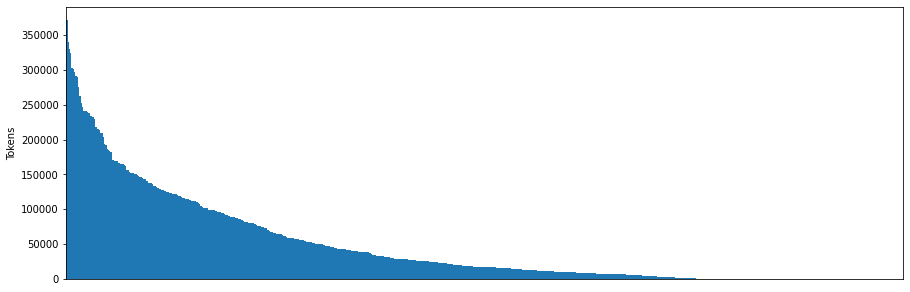

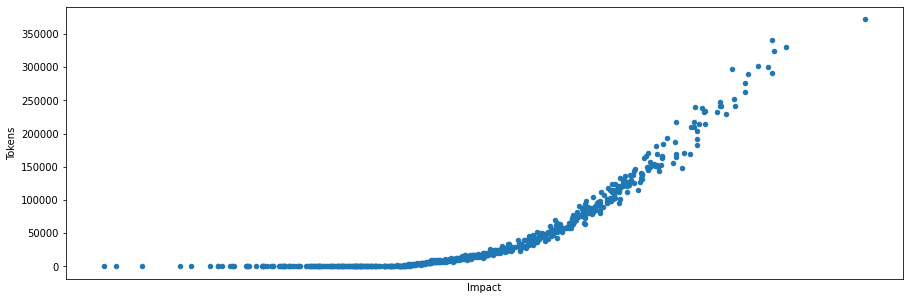

In [15]:
analyze_simulation(results)

## Q2: Does the number of projects reviewed affect the outcome?

scoring_method               median
vote_quorum                      17
min_amount                     1500
normalize                      True
num_projects_above_quorum       613
avg_payout                    48883
median_payout                 37662
max_payout                   242175
dtype: object


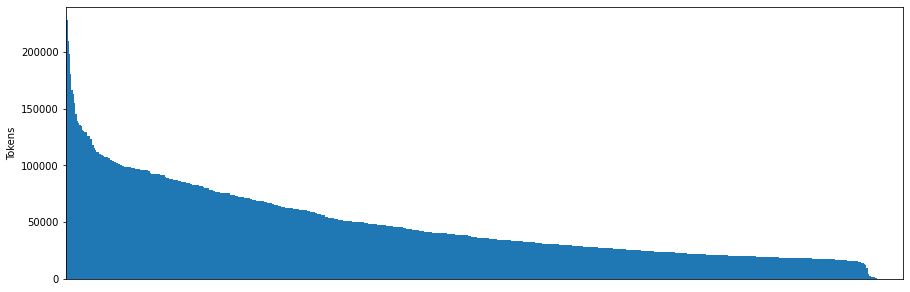

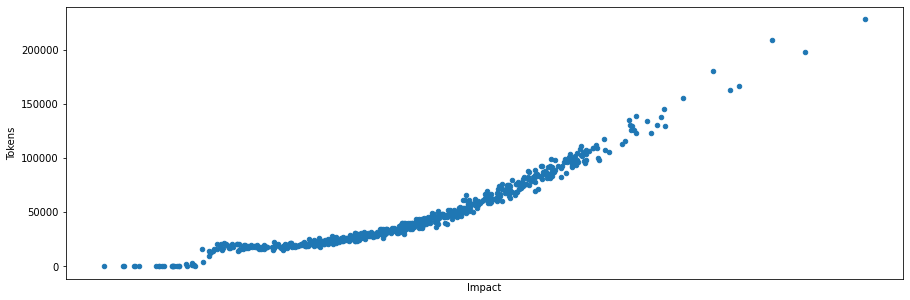

In [16]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.1, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=17,
    min_amount=1500,
    normalize=True
)
analyze_simulation(results)

<Axes: xlabel='num_votes', ylabel='token_amount'>

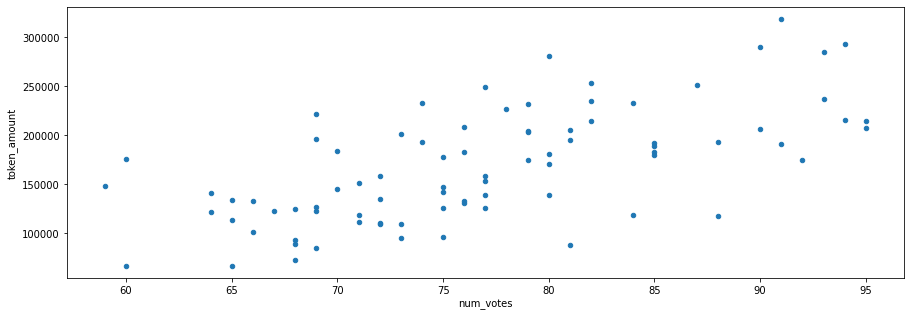

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
df = pd.DataFrame(simulation.get_project_data())
df[df['rating'].between(4,5)].plot(kind='scatter', x='num_votes', y='token_amount', ax=ax)

## Q3. What is the impact of a 1,500 OP minimum?

scoring_method               median
vote_quorum                      17
min_amount                        1
normalize                      True
num_projects_above_quorum       478
avg_payout                    62711
median_payout                 32509
max_payout                   393434
dtype: object


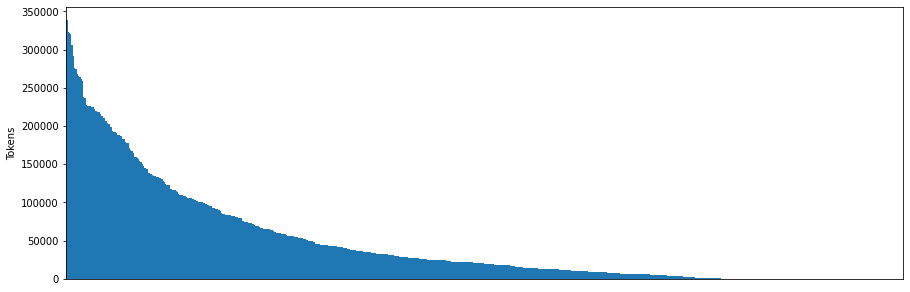

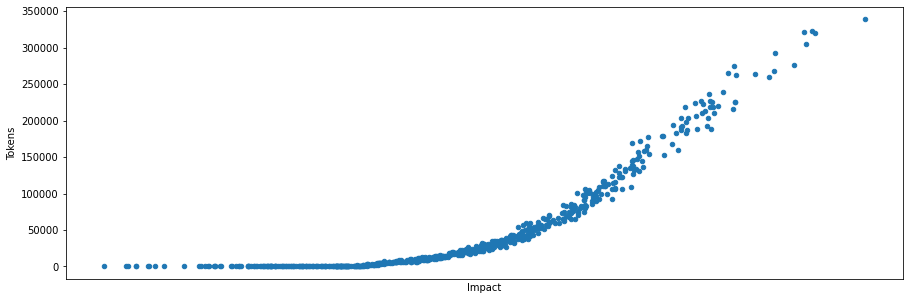

In [17]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=17,
    min_amount=1,
    normalize=True
)
analyze_simulation(results)

## Q4. What if we use the mean or QF formula?

scoring_method                 mean
vote_quorum                      17
min_amount                     1500
normalize                      True
num_projects_above_quorum       480
avg_payout                    62398
median_payout                 37786
max_payout                   347658
dtype: object


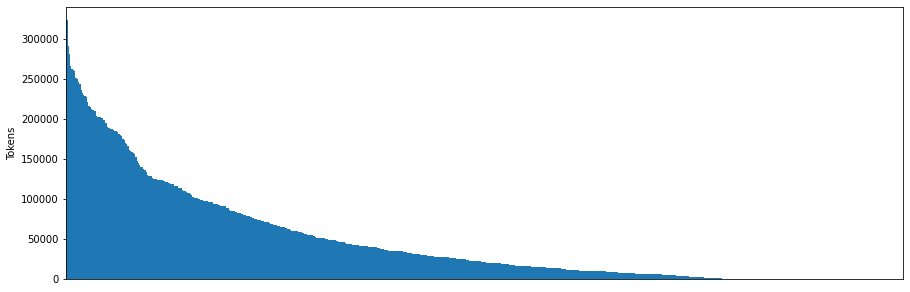

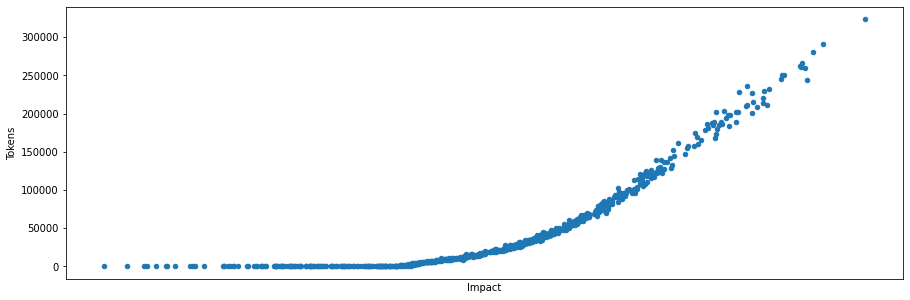

In [18]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='mean',
    quorum=17,
    min_amount=1500,
    normalize=True
)
analyze_simulation(results)

scoring_method               quadratic
vote_quorum                         17
min_amount                        1500
normalize                         True
num_projects_above_quorum          454
avg_payout                       66012
median_payout                    42259
max_payout                      338246
dtype: object


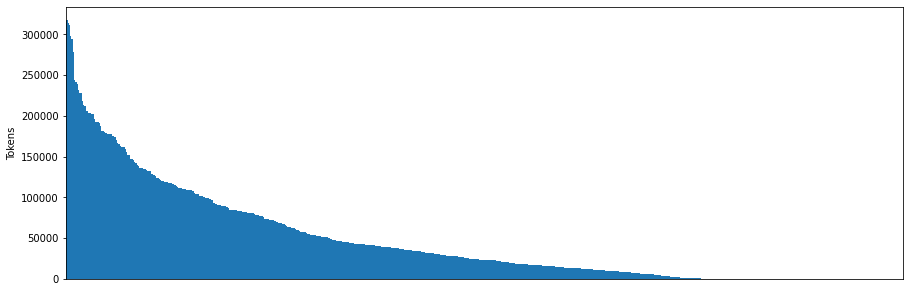

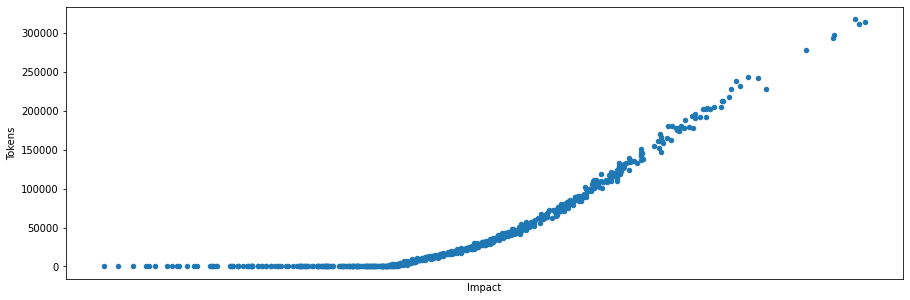

In [19]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='quadratic',
    quorum=17,
    min_amount=1500,
    normalize=True
)
analyze_simulation(results)

## Q5. What is the impact of a higher quorum?

scoring_method               median
vote_quorum                      34
min_amount                     1500
normalize                      True
num_projects_above_quorum       311
avg_payout                    96471
median_payout                 63710
max_payout                   454424
dtype: object


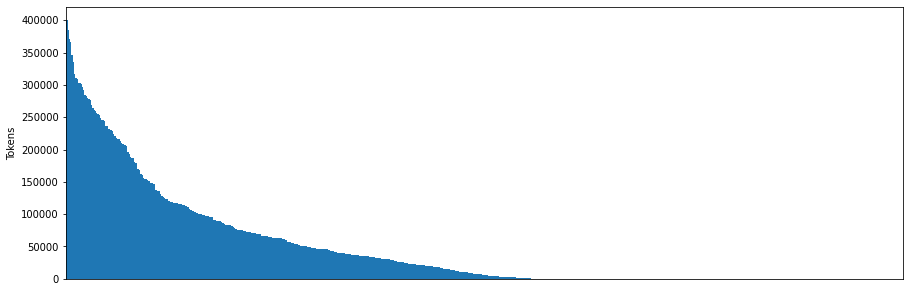

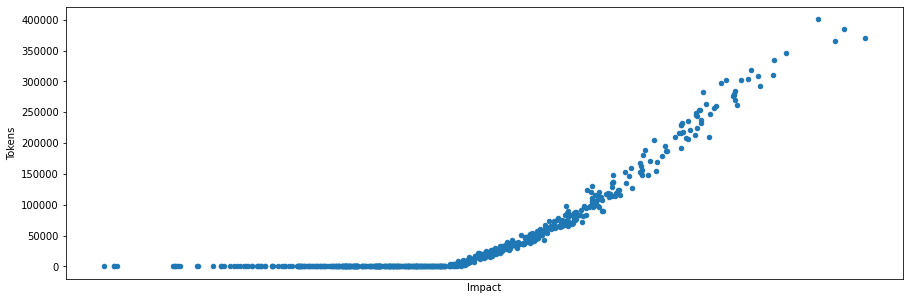

In [21]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)

results = simulation.simulate_voting_and_scoring(
    n=10,
    scoring_method='median',
    quorum=34,
    min_amount=1500,
    normalize=True
)
analyze_simulation(results)

## Q6 What's the impact of zero votes on different types of projects?

In [73]:
simulation = Simulation()

simulation.initialize_round(
    max_funding=30_000_000
)
simulation.randomize_voters(
    num_voters=150, 
    willingness_to_spend=1.0, 
    laziness_factor=0.5, 
    expertise_factor=0.5
)
simulation.randomize_projects(
    num_projects=643
)
simulation.simulate_voting()

In [74]:
simulation.allocate_votes(scoring_method='median')

cases = [15,25,55,75]
results = {}
for p in simulation.round.projects:
    n = p.num_votes
    if n in results or n not in cases:
        continue
    results[n] = {
        'project': p,
        'base_tokens': p.token_amount
    }

for z in range(0,10):
    for case in cases:
        results[case]['project'].add_zeroes(1)
        simulation.allocate_votes(scoring_method='median')
        results[case].update({z:results[case]['project'].token_amount})        

,base_tokens,0,1,2,3,4,5,6,7,8,9
15,3677.2,3656.31,3636.95,3510.37,3382.99,3309.07,3234.98,3039.24,2843.17,2454.67,2066.3
25,5069.07,4708.64,4349.99,4156.26,3961.59,3662.08,3362.28,3309.89,3257.23,2949.91,2642.75
55,75611.76,66377.21,57142.63,56399.36,55660.7,51564.58,47458.12,46251.51,45045.56,40999.83,36952.26
75,150828.39,147786.55,144742.11,139066.22,133387.76,132476.2,131564.32,130072.74,128580.86,127226.67,125871.93


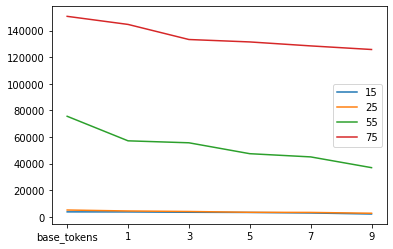

In [76]:
analysis = pd.DataFrame(results)
analysis = analysis.iloc[1:,:].T
analysis.sort_index(inplace=True)
analysis.T.plot(kind='line')
analysis